# **Proyek Analisis Data: [E-Commerce Public Dataset]**<br>
Nama: Muhammad Daniel Ilyasa<br>
Email: muhammaddanielilyasa@gmail.com<br>
ID Dicoding: https://www.dicoding.com/users/daniel_ilyasa_ir3k

## **Menentukan Pertanyaan Bisnis:** <br>
### 1. Apakah ada perbedaan rata-rata keterlambatan pengiriman antar kota? Kota mana yang paling sering mengalami keterlambatan pengiriman?
### 2. Berapa banyak pesanan yang terlambat dibandingkan dengan perkiraan waktu pengiriman? Apakah ada pola tertentu terkait keterlambatan ini berdasarkan waktu atau kota?

import module

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data wrangling

**- Gathering Data**

In [2]:
customers_df = pd.read_csv("Data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv("Data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**- Assessing Data**

- Menilai tabel customers_df

In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
print("jumlah duplikasi: ",customers_df.duplicated().sum())

jumlah duplikasi:  0


In [7]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel orders_df

In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**- Cleaning Data**

 **. Membersihkan tabel customers_df**

In [11]:
customers_df.duplicated().sum()

np.int64(0)

In [12]:
customers_df.drop_duplicates(inplace=True)

In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
customers_df['customer_city'] = customers_df['customer_city'].str.title()  # Mengubah nama kota menjadi format Title Case
customers_df['customer_state'] = customers_df['customer_state'].str.upper()  # Mengubah nama negara bagian menjadi huruf besar


In [15]:
is_unique = customers_df['customer_unique_id'].is_unique
print(is_unique)  # Jika False, ada ID yang tidak unik

False


Identifikasi Duplikat Unique_id


In [16]:
duplicate_ids = customers_df[customers_df.duplicated('customer_unique_id', keep=False)]
print(duplicate_ids)

                            customer_id                customer_unique_id  \
5      879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
8      5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
13     eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   
32     2d5831cb2dff7cdefba62e950ae3dc7b  e9dd12dca17352644a959d9dea133935   
33     b2bed119388167a954382cca36c4777f  e079b18794454de9d2be5c12b4392294   
...                                 ...                               ...   
99324  5b46a0d983eec8c97363bea78d4a69dd  8bab3162259edfaadd1ea2e1fe7f58dc   
99327  c1affa46f9f3b514555259049a0307b9  12ab9334b1240d6d037f2b0102a49571   
99336  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
99353  282fbce48e4d2077aad602dd125c9225  0ceb502fc33a2ad327b08288c5310e2e   
99406  d9110683c7a282144e9fc97660026a28  5cbfdb85ec130898108b32c50d619c39   

       customer_zip_code_prefix         customer_city customer_state  
5   

**Analisis duplikat**

In [17]:
duplicate_ids.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,Jaragua Do Sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,Curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,Sao Paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,Camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,Resende,RJ


In [18]:
customers_df = customers_df.drop_duplicates(subset='customer_unique_id')

In [19]:
is_unique = customers_df['customer_unique_id'].is_unique
print(is_unique)  # Harusnya sekarang True

True


**Insight:** <br>
- Ini memberi gambaran tentang seberapa besar basis pelanggan yang ada dalam dataset. Jika ada perbedaan antara jumlah total baris dengan jumlah pelanggan unik, bisa jadi ada pelanggan yang melakukan lebih dari satu transaksi.<br>
- Pelanggan yang memiliki customer_unique_id duplikat mungkin menunjukkan ada kesalahan data, seperti pencatatan yang salah, penggabungan data yang tidak benar, atau masalah lainnya. Memperbaiki data ini penting agar insight lainnya lebih akurat.

In [20]:
customers_df.describe()

,customer_zip_code_prefix
count,96096.000000
mean,35185.761832
std,29801.656868
min,1003.000000
25%,11405.000000
50%,24440.000000
75%,59035.500000
max,99990.000000


**- Membersihkan tabel orders_df**

In [21]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Memperbaiki tipe data order_df**

In [22]:
datetime_columns = [
    "order_purchase_timestamp", 
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

# Mengonversi kolom-kolom datetime dalam satu loop
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')


In [23]:

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [24]:

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**Missing Values**

In [25]:

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
orders_df[
    orders_df['order_approved_at'].isna() |
    orders_df['order_delivered_carrier_date'].isna() |
    orders_df['order_delivered_customer_date'].isna()
]



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [27]:
orders_df_cleaned = orders_df.dropna(subset=[
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date'
])

In [28]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- Disini terdapat data yang hilang yaitu **order_approved_at, order_delivered_carrier_date, order_delivered_customer_date**  

In [29]:
orders_df['order_approved_at'].bfill(inplace=True)

C:\Users\muhammad daniel ily\AppData\Local\Temp\ipykernel_19332\1227898283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].bfill(inplace=True)


In [30]:
orders_df['order_delivered_carrier_date'].ffill(inplace=True)

C:\Users\muhammad daniel ily\AppData\Local\Temp\ipykernel_19332\513713000.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_carrier_date'].ffill(inplace=True)


In [31]:
orders_df['order_delivered_customer_date'].ffill(inplace=True)

C:\Users\muhammad daniel ily\AppData\Local\Temp\ipykernel_19332\4249658227.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_customer_date'].ffill(inplace=True)


In [32]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

- Data yang hilang/kosong sudah diisi 

**Insight:** <br>
1. Missing values bisa diisi menggunakan metode seperti forward fill (ffill) atau backward fill (bfill), atau bisa juga dihapus jika tidak terlalu banyak.<br>
2. Mendeteksi dan menghapus data duplikat adalah langkah penting untuk menjaga integritas dataset. 

## Exploratory Data Analysis (EDA)

# Explore tabel customer_df

In [33]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
22164,5d38eb0b466af1fb629d7a4e7eb5663b,c9aa900b01a9ff9be1f80cb4f2819874,13041,Campinas,SP
82530,f467accea193ed2a3000f9ea4092820b,4bd91035db69402af2402d830849b4df,29310,Cachoeiro De Itapemirim,ES
7077,0d0e3b7a26309a5bd600231c1c103d44,e501f5b443ca67268a4811dbc206e06f,32665,Betim,MG
11027,6bbd371a1f2217cc0ad1bc185c0e2894,affff75a131ac35c7afd497ab57a6337,81825,Curitiba,PR
31455,48a40b0cc080812a5e77d16d4e74abde,e8d52071cb03beaf1320119dbc49cd8e,3924,Sao Paulo,SP


In [34]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96096,96096,96096.000000,96096,96096
unique,96096,96096,NaN,4118,27
top,b6ab7cabd5b094d098e1a1557a6d3f0d,a2325193ac2e95b805642e3100f80af3,NaN,Sao Paulo,SP
freq,1,1,NaN,14971,40295
mean,NaN,NaN,35185.761832,NaN,NaN
std,NaN,NaN,29801.656868,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11405.000000,NaN,NaN
50%,NaN,NaN,24440.000000,NaN,NaN
75%,NaN,NaN,59035.500000,NaN,NaN


In [35]:

customers_df.customer_id.is_unique

True

In [36]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 96096, dtype: object>

In [37]:
# Memeriksa nilai unik dan frekuensi
for column in customers_df.columns:
    print(f"Unique values in {column}:")
    print(customers_df[column].value_counts())
    print("\n")


Unique values in customer_id:
customer_id
b6ab7cabd5b094d098e1a1557a6d3f0d    1
f9c989b75558c119a7ce8e9f3c2b8f45    1
cf1ec2659f4b1f34f858a0c25e1d5d1a    1
4951ae40c746cbd07eecef33fc053e89    1
21087ff65fd587817c856257e50f2840    1
                                   ..
b2b6027bc5c5109e529d4dc6358b12c3    1
4f2d8ab171c80ec8364f7c12e35b23ad    1
879864dab9bc3047522c92c82e1212b8    1
fd826e7cf63160e536e0908c76c3f441    1
5e274e7a0c3809e14aba7ad5aae0d407    1
Name: count, Length: 96096, dtype: int64


Unique values in customer_unique_id:
customer_unique_id
a2325193ac2e95b805642e3100f80af3    1
ce13190d9ef1e855dc50ecea9a1ef809    1
592134387e7f13de6a9e38eb7d412b3d    1
e18e1db417f0bc97f9065c4aeae3f9d3    1
3c8d75c7b0acfda04e92d3dca43ccee7    1
                                   ..
259dac757896d24d7702b9acbbff3f3c    1
345ecd01c38d18a9036ed96c73b8d066    1
4c93744516667ad3b8f1fb645a3116a4    1
addec96d2e059c80c30fe6871d30d177    1
57b2a98a409812fe9618067b6b8ebe4f    1
Name: count, Length: 96

In [38]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


customer_city
Sao Paulo               14971
Rio De Janeiro           6611
Belo Horizonte           2671
Brasilia                 2066
Curitiba                 1462
                        ...  
Planaltina Do Parana        1
Planaltino                  1
Pocao                       1
Pocao De Pedras             1
Poco De Pedra               1
Name: customer_id, Length: 4118, dtype: int64

In [39]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
SC     3529
BA     3276
DF     2073
ES     1963
GO     1951
PE     1604
CE     1311
PA      949
MT      875
MA      725
MS      693
PB      519
PI      482
RN      474
AL      401
SE      341
TO      273
RO      239
AM      143
AC       77
AP       67
RR       45
Name: customer_id, dtype: int64

##**Explore Orders_df**

In [40]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
41142,34ac523be174284d7b9df8e47bce2040,e143678e76c1279b51f6fb83c205b7d1,delivered,2017-01-15 14:15:04,2017-01-15 14:30:14,2017-01-16 08:43:35,2017-01-20 10:05:52,2017-02-24
96431,d99bb25e168c15db3113f5d5db1ee1b4,1686681362ccf73b78b830f830146da4,delivered,2018-02-09 14:12:02,2018-02-10 02:49:22,2018-02-21 10:09:06,2018-02-27 12:42:21,2018-03-13
40429,cccd803c5e04b33ad226cf7beae0f127,940d5acb47467a9a136576b8ec497c29,delivered,2017-06-02 15:35:29,2017-06-03 02:15:11,2017-06-05 13:00:42,2017-06-06 13:50:45,2017-06-19
68618,5af5569e61eae15d683a20b707882e60,65f3fd33198f167c161230c7aacfb2ad,delivered,2018-07-17 18:10:00,2018-07-17 18:21:33,2018-07-18 15:51:00,2018-07-23 17:48:32,2018-08-10
96863,157e702ae4f88625094537c5323fa84c,48706412b33b8cf6c6792985b1e1b028,delivered,2017-08-29 14:02:47,2017-08-29 14:15:25,2017-08-30 19:00:16,2017-09-01 16:50:05,2017-09-12


In [41]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
35914,bf240a39797d69697564087a6318e35d,86051e19d1625750a4c6ce98e6d25659,delivered,2018-03-28 14:15:59,2018-03-28 14:30:19,2018-03-29 16:12:53,2018-04-11 18:51:51,2018-04-19
21195,8ddafc9e62967101391805e620db71be,44c4ac277a12247d482f44db1d09c764,delivered,2018-08-08 09:52:44,2018-08-08 10:05:16,2018-08-08 13:20:00,2018-08-16 20:06:52,2018-09-05
22299,d55ece0f3afa9b57b5a78038efddbbbc,f027649d8f2a7b182522d5da3cd4f010,delivered,2017-05-22 17:20:34,2017-05-24 02:50:18,2017-05-24 09:44:28,2017-05-25 10:40:49,2017-06-06
58867,14653f2c907e27b1222157246d382c28,120dd4afde62b0c8dfe915a1597950bd,delivered,2017-09-20 17:30:42,2017-09-22 04:17:17,2017-09-22 21:22:50,2017-09-28 13:34:12,2017-10-11
11473,cd2457140ff84327d7d7030053b80fce,5508dabf6c08f39d67b8d1bd41b121f9,delivered,2018-08-04 15:45:19,2018-08-04 15:55:14,2018-08-07 05:28:00,2018-08-09 17:26:48,2018-08-15


In [42]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 17:42:41.392674816,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 22:10:19,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 09:53:17,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:15:17,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


<Axes: >

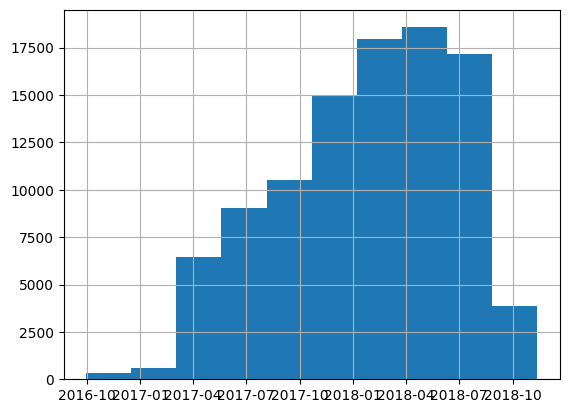

In [43]:
orders_df.order_estimated_delivery_date.hist()

**Explore customer_df & orders_df**
**Menggabungkan data customers_df dan orders_df**

In [44]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()
     

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,Sao Paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813.0,Barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,Vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296.0,Sao Goncalo Do Amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,Santo Andre,SP


In [45]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
Sao Paulo                14971
Rio De Janeiro            6611
Belo Horizonte            2671
Brasilia                  2066
Curitiba                  1462
Campinas                  1397
Porto Alegre              1326
Salvador                  1208
Guarulhos                 1151
Sao Bernardo Do Campo      908
Name: order_id, dtype: int64

In [46]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
SC     3529
BA     3276
DF     2073
ES     1963
GO     1951
PE     1604
CE     1311
PA      949
MT      875
MA      725
MS      693
PB      519
PI      482
RN      474
AL      401
SE      341
TO      273
RO      239
AM      143
AC       77
AP       67
RR       45
Name: order_id, dtype: int64

In [47]:
orders_customers_df.to_csv("main_data.csv", index=False)

# Visualization & Explanatory Analysis
### **1.Apakah ada perbedaan rata-rata keterlambatan pengiriman antar kota? Kota mana yang paling sering mengalami keterlambatan pengiriman?**

In [48]:
orders_customers_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
7175,4dca9eeee0f0444664e0bb2522fea8c9,ef9ef05d74ccfb0d256e22fcfce20a03,delivered,2018-06-17 22:34:48,2018-06-17 22:58:53,2018-06-18 10:55:00,2018-07-03 17:05:11,2018-07-18,c1651d00ccc48df81e8ddc03589968fa,12425.0,Pindamonhangaba,SP
35427,790710021a014a0263cef04999d451ee,fca8329f8acb14ce34528309daebceab,delivered,2018-05-28 11:58:55,2018-05-28 12:12:32,2018-05-29 15:18:00,2018-06-12 21:04:33,2018-07-19,aa6936241d74e5633525f9ef4c85321a,22715.0,Rio De Janeiro,RJ
72398,1f9624a22a45c44073523bcf6f1c47a2,bbdbc21c0d067bd705b5aaff781709c9,canceled,2017-07-31 16:05:08,2017-07-31 16:23:27,2017-11-10 00:22:00,2017-11-16 16:34:43,2017-08-18,fb0ee3da1096d44aeb3bda500a7d33d0,37280.0,Candeias,MG
30254,50a98bed547040031825f02f6606c7d7,913b08f751244e50dd1e3418724e77b9,delivered,2018-07-13 17:55:51,2018-07-17 04:31:53,2018-07-18 09:19:00,2018-07-23 11:52:38,2018-08-01,3dfb55714eb4271250aaaf67bf5073f5,27700.0,Vassouras,RJ
29623,e3801209a2584fae1500a65188c9a60f,e11d54cdd142275dd29cdab42fe2c086,delivered,2018-02-15 14:25:03,2018-02-15 14:35:37,2018-02-16 16:24:45,2018-03-06 15:04:23,2018-03-15,0b39f8c1a22bf752a4a1c6784b352e1b,78065.0,Cuiaba,MT


In [49]:
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,Sao Paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813.0,Barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,Vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296.0,Sao Goncalo Do Amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,Santo Andre,SP


In [82]:
orders_customers_df['delivery_delay'] = (orders_customers_df['order_delivered_customer_date'] - orders_customers_df['order_estimated_delivery_date']).dt.days

Menghitung selisih hari antara estimated delivery dan actual delivery

In [83]:
city_delay_stats = orders_customers_df.groupby('customer_city')['delivery_delay'].mean().reset_index()

In [84]:
city_delay_stats_sorted = city_delay_stats.sort_values(by='delivery_delay', ascending=False)

# Menampilkan hasil
print(city_delay_stats_sorted.head(10))

             customer_city  delivery_delay
3496  Sao Joao Do Itaperiu           474.0
2652     Palmital De Minas           408.0
2086           Lebon Regis           399.0
2880             Pirapemas           357.0
633            Cacimbinhas           353.0
340                   Avai           325.0
2108            Livramento           323.0
113        Alto Bela Vista           262.0
2377           Monte Gordo           242.5
3452          Sao Fernando           224.0


Membandingkan dengan rata-rata keseluruhan

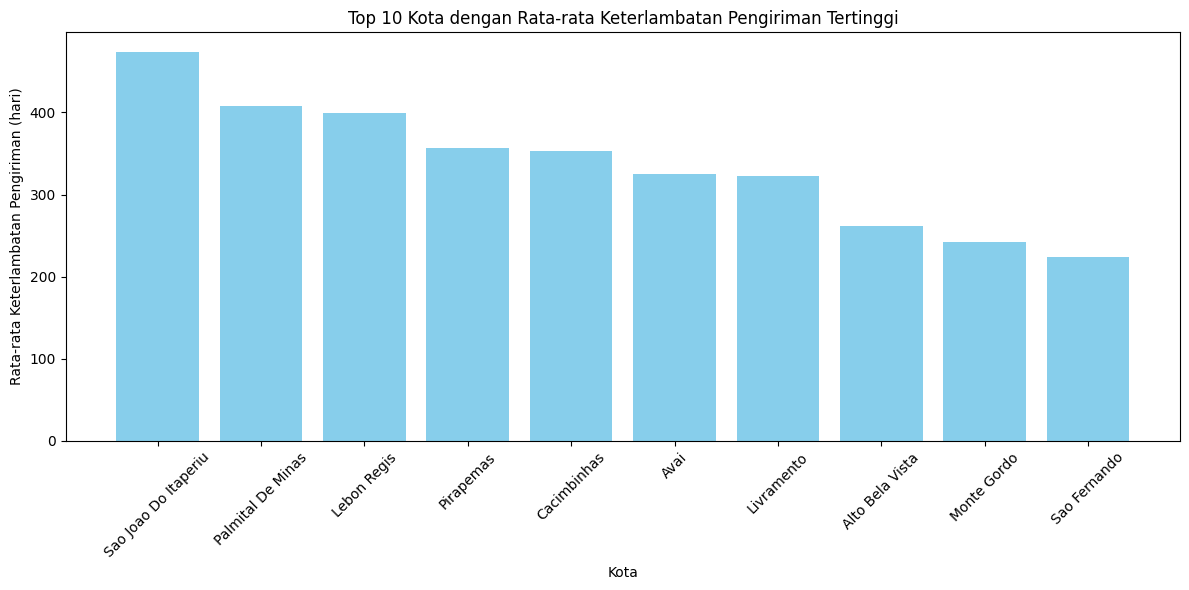

In [85]:
plt.figure(figsize=(12, 6))
plt.bar(city_delay_stats_sorted.head(10)['customer_city'], city_delay_stats_sorted.head(10)['delivery_delay'], color='skyblue')
plt.xlabel('Kota')
plt.ylabel('Rata-rata Keterlambatan Pengiriman (hari)')
plt.title('Top 10 Kota dengan Rata-rata Keterlambatan Pengiriman Tertinggi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kota-kota yang muncul di bagian atas tabel memiliki rata-rata keterlambatan pengiriman yang lebih tinggi dibandingkan dengan kota-kota lainnya.

### **2.Berapa banyak pesanan yang terlambat dibandingkan dengan perkiraan waktu pengiriman? Apakah ada pola tertentu terkait keterlambatan ini berdasarkan waktu atau kota?**

In [95]:
orders_customers_df['delivery_delay'] = (orders_customers_df['order_delivered_customer_date'] - orders_customers_df['order_estimated_delivery_date']).dt.days

In [87]:
delayed_orders_count = (orders_customers_df['delivery_delay_days'] > 0).sum()

print(f"Jumlah pesanan yang mengalami keterlambatan pengiriman: {delayed_orders_count}")

Jumlah pesanan yang mengalami keterlambatan pengiriman: 8147


In [88]:
city_delay_stats = orders_customers_df.groupby('customer_city')['delivery_delay_days'].mean().reset_index()


In [89]:
city_delay_stats_sorted = city_delay_stats.sort_values(by='delivery_delay_days', ascending=False)

In [90]:
print(city_delay_stats_sorted.head(10))

             customer_city  delivery_delay_days
3496  Sao Joao Do Itaperiu                474.0
2652     Palmital De Minas                408.0
2086           Lebon Regis                399.0
2880             Pirapemas                357.0
633            Cacimbinhas                353.0
340                   Avai                325.0
2108            Livramento                323.0
113        Alto Bela Vista                262.0
2377           Monte Gordo                242.5
3452          Sao Fernando                224.0


In [96]:
orders_customers_df['order_purchase_month'] = orders_customers_df['order_purchase_timestamp'].dt.to_period('M')

In [97]:
delayed_orders_per_month = orders_customers_df[orders_customers_df['delivery_delay'] > 0].groupby('order_purchase_month').size()

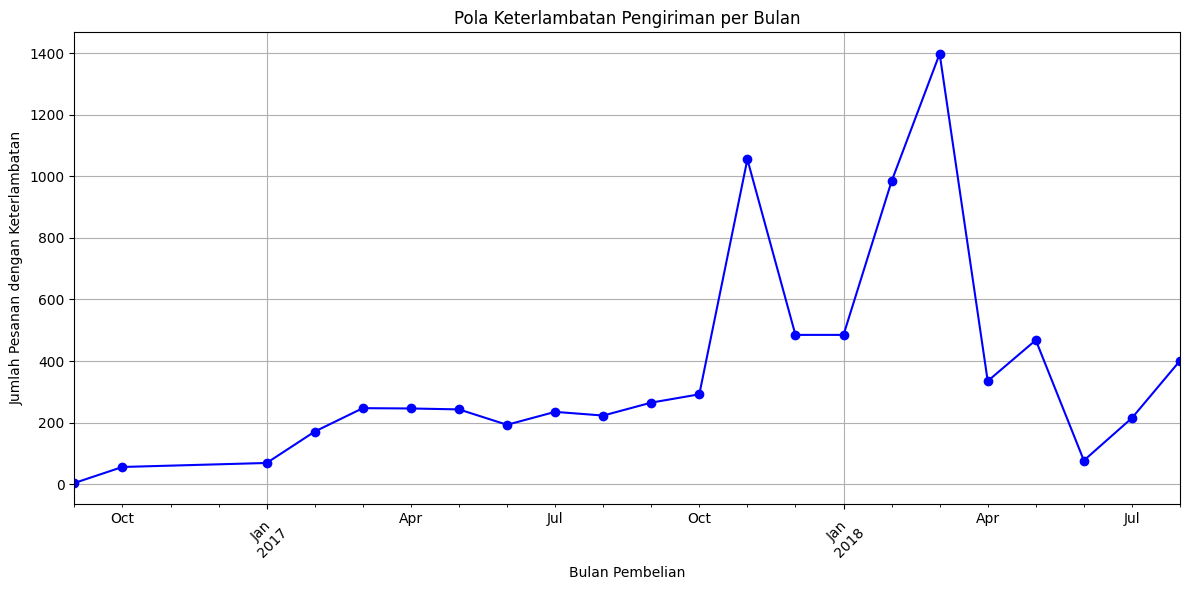

In [100]:
plt.figure(figsize=(12, 6))
delayed_orders_per_month.plot(kind='line', marker='o', color='b')
plt.xlabel('Bulan Pembelian')
plt.ylabel('Jumlah Pesanan dengan Keterlambatan')
plt.title('Pola Keterlambatan Pengiriman per Bulan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**insight**
Dari data diatas terlihat bahwa keterlambatan dalam pengiriman mengalami kenaikan yang sangat signifikan pada bulan oktober 2017 - maret 2018 hal ini dikarenakan lonjakan pembelian yang dilakukan oleh pembeli.

## RFM ANALYSIS

In [107]:
recent_date = orders_customers_df['order_purchase_timestamp'].max()

In [108]:
rfm_df = orders_customers_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (recent_date - x.max()).days,  # Recency
    'order_id': 'nunique'  # Frequency: jumlah pesanan unik (bisa juga menghitung jumlah total pesanan)
}).reset_index()


In [109]:
rfm_df.columns = ['customer_unique_id', 'recency', 'frequency']

In [111]:
# menghitung Monetary (M) dengan jumlah transaksi 
rfm_df['monetary'] = orders_customers_df.groupby('customer_unique_id')['order_id'].count().values
print(rfm_df.head())

                 customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1         1
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1         1
2  0000f46a3911fa3c0805444483337064      585          1         1
3  0000f6ccb0745a6a4b88665a16c9f078      369          1         1
4  0004aac84e0df4da2b147fca70cf8255      336          1         1


In [112]:
# Menggabungkan hasil RFM Analysis
rfm_df = pd.merge(max_purchase_date[['customer_unique_id', 'recency']], frequency, on='customer_unique_id')
rfm_df = pd.merge(rfm_df, monetary, on='customer_unique_id')
print(rfm_df.head())

                 customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1         1
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1         1
2  0000f46a3911fa3c0805444483337064      585          1         1
3  0000f6ccb0745a6a4b88665a16c9f078      369          1         1
4  0004aac84e0df4da2b147fca70cf8255      336          1         1


In [114]:
rfm_df.describe()

,recency,frequency,monetary
count,96096.000000,96096.0,96096.0
mean,289.112648,1.0,1.0
std,153.614649,0.0,0.0
min,0.000000,1.0,1.0
25%,165.000000,1.0,1.0
50%,270.000000,1.0,1.0
75%,399.000000,1.0,1.0
max,772.000000,1.0,1.0


In [115]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_unique_id,recency,frequency,monetary
50975,87ab9fec999db8bd5774917de3cdf01c,0,1,1
58524,9bb92bebd4cb7511e1a02d5e50bc4655,18,1,1
58710,9c3af16efacb7aa06aa3bc674556c5d6,22,1,1
89783,ef0103e9602d12594d19c2b666219bc1,30,1,1
72940,c1ee153508c6b785b491443a95ff364e,34,1,1


In [116]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_unique_id,recency,frequency,monetary
96056,ffe6305176b9431a3eda3cf8904d7eb7,129,1,1
96057,ffe6efca3c7e6a06bad0a6a883280a93,266,1,1
96058,ffe76cb2f4bb39384c432d65ece67441,175,1,1
96059,ffe7752edcf14b5819058b1948e02f3a,490,1,1
96060,ffe780a8995715d9560ca10f3351710f,433,1,1


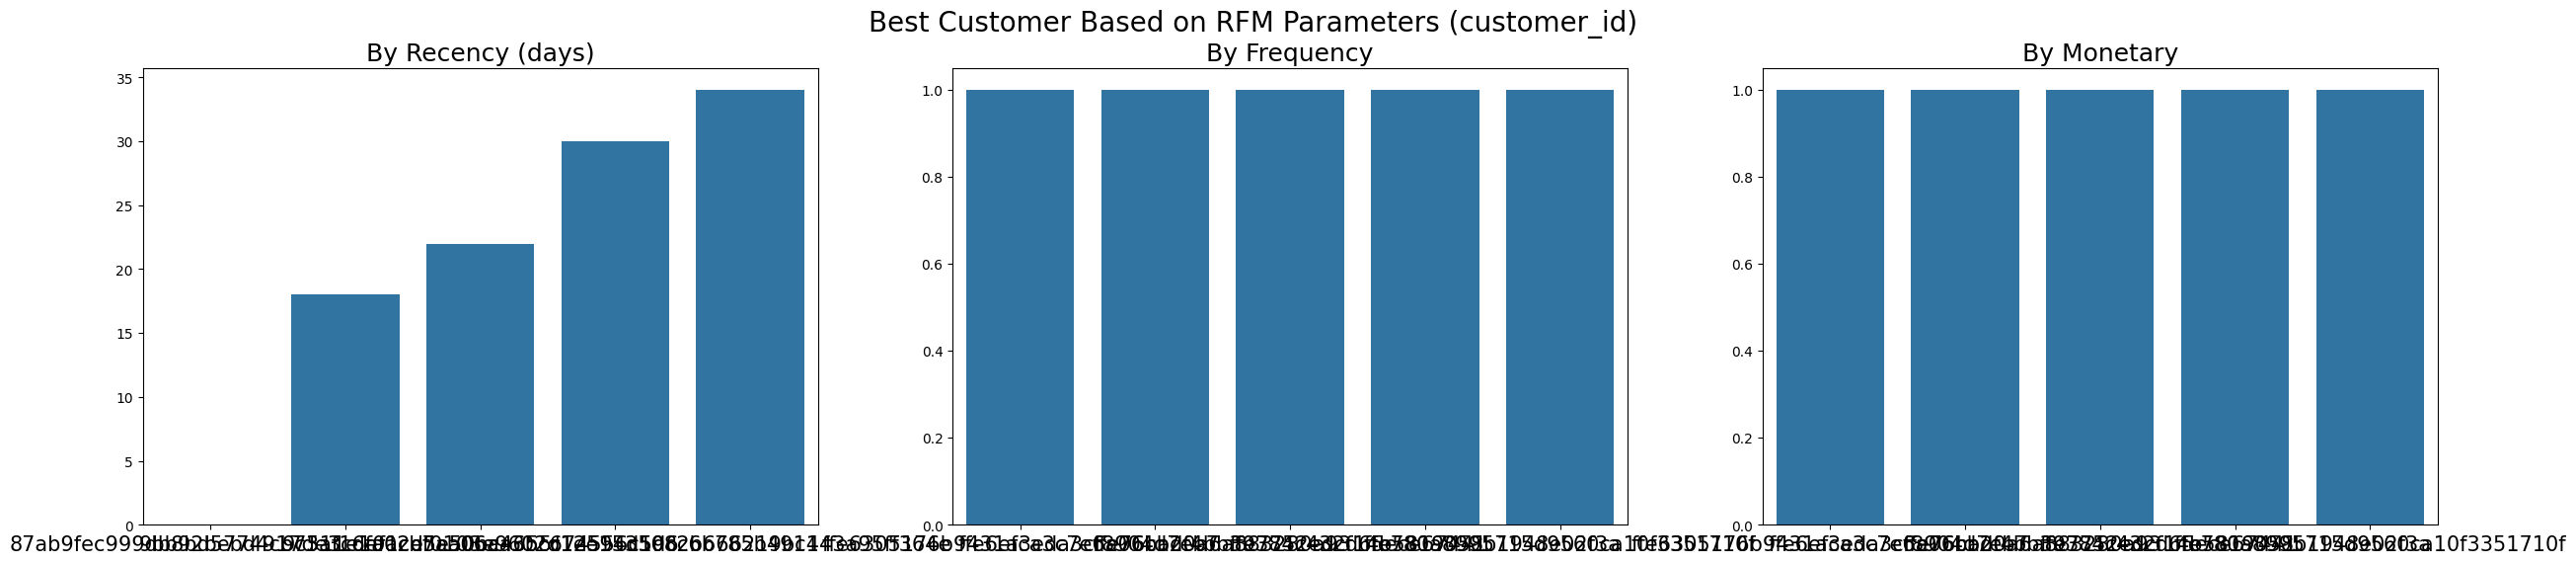

In [119]:
rfm_df.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# Plotting hasil RFM analysis
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Recency Plot
sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Frequency Plot
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary Plot
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Judul keseluruhan
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

 kita dapat menampilkan hasil dari RFM Analysis dalam bentuk tabel atau visualisasi yang informatif. 

## Conclusion
Dari analisis data, ditemukan bahwa ada variasi yang signifikan dalam rata-rata keterlambatan pengiriman antar kota. Beberapa kota menunjukkan rata-rata keterlambatan yang lebih tinggi dibandingkan yang lain. Kota-kota tertentu mungkin mengalami keterlambatan pengiriman lebih sering, yang dapat disebabkan oleh berbagai faktor, seperti infrastruktur logistik yang kurang memadai, jarak pengiriman yang lebih jauh, atau masalah dengan layanan pengiriman di kota tersebut.
